In [1]:
import numpy as np
import matplotlib.pyplot as plt
from image import Image

# Notes
- Resolution shouldn't change since it's just zooming in after taking the image
- How large does it have to be to keep beam in field of view while tuning?

## Example image

In [2]:
im = np.load("./saved_images/MD_20210924/img_09-26_00-00-02.npy")
ncol =  np.load("./saved_images/MD_20210924/ncol_09-26_00-56-22.npy")
nrow =  np.load("./saved_images/MD_20210924/nrow_09-26_00-56-22.npy") 

ncol, nrow

(array(262), array(350))

## raw from PV with some ROI set in PVs

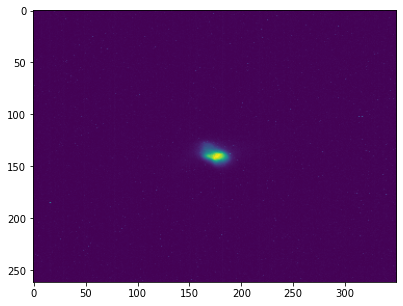

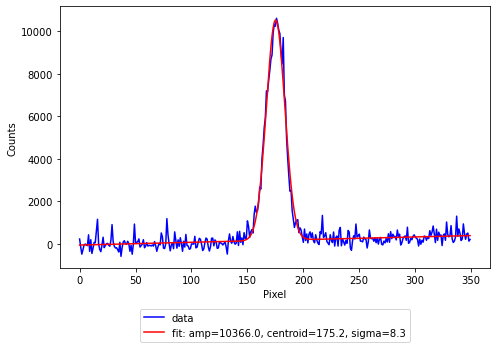

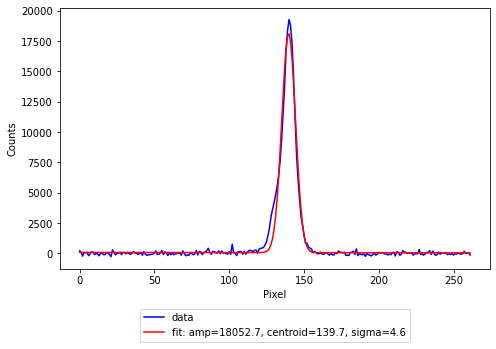

In [5]:
beam_image = Image(im, ncol, nrow, bg_image = None) 
beam_image.reshape_im()
plt.figure(figsize = (15,5))
plt.imshow(beam_image.proc_image)
beam_image.get_im_projection();
beamsizes = beam_image.get_sizes(show_plots=True)
plt.close()

## new ROI

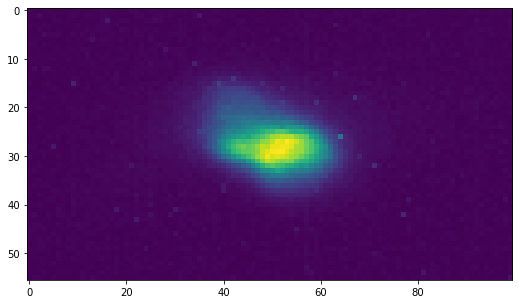

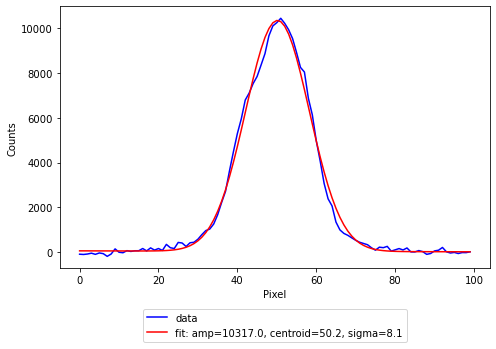

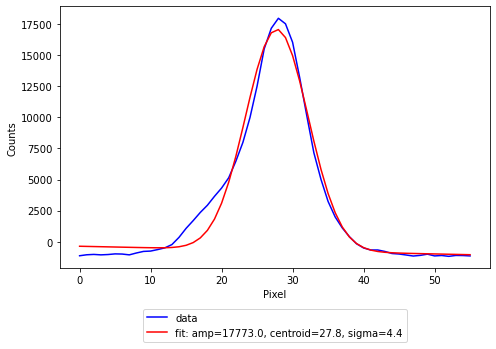

In [14]:
beam_image = Image(im, ncol, nrow, bg_image = None) 
beam_image.reshape_im()
# [y,x] or [col, row]
beam_image.proc_image = beam_image.proc_image[112:168, 125:225]
plt.figure(figsize = (15,5))
plt.imshow(beam_image.proc_image)
beam_image.get_im_projection();
beamsizes = beam_image.get_sizes(show_plots=True)
plt.close()

## adaptive ROI

175.20427722765368 139.71697643044712


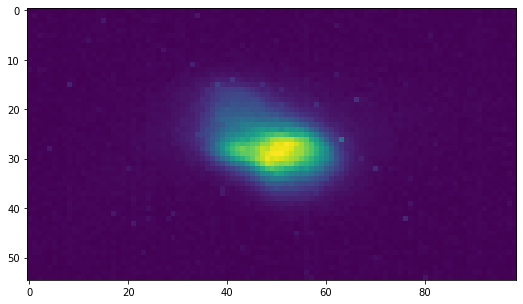

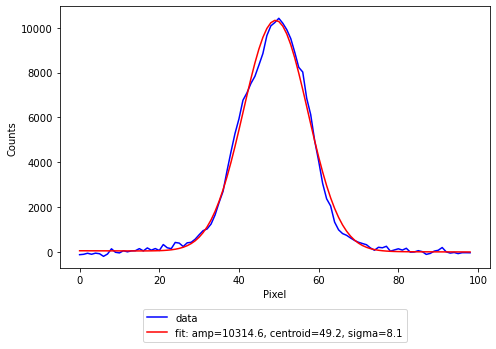

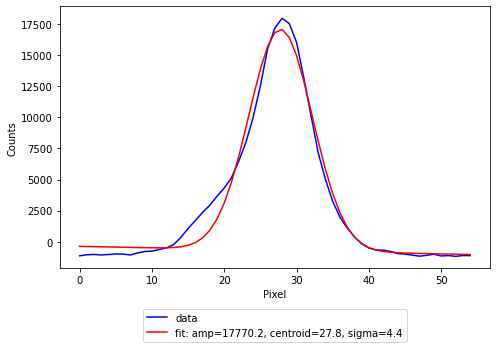

In [25]:
beam_image = Image(im, ncol, nrow, bg_image = None) 
beam_image.reshape_im()
beam_image.get_im_projection();
beamsizes = beam_image.get_sizes(show_plots=False)
print(beam_image.xcen, beam_image.ycen)
# adapt ROI
xmin = int(np.rint(beam_image.xcen - 6*beam_image.xrms))
xmax = int(np.rint(beam_image.xcen + 6*beam_image.xrms))
ymin = int(np.rint(beam_image.ycen - 6*beam_image.yrms))
ymax = int(np.rint(beam_image.ycen + 6*beam_image.yrms))

beam_image.proc_image = beam_image.proc_image[ymin:ymax, xmin:xmax]
plt.figure(figsize = (15,5))
plt.imshow(beam_image.proc_image)
beam_image.get_im_projection();
beamsizes = beam_image.get_sizes(show_plots=True)
plt.close()

In [27]:
np.__version__

'1.19.2'